In [1]:
import numpy as np
import pandas as pd

In [2]:
class LinearRegression:
    def __init__(self, learning_rate= 0.01, n_iters= 1000):
        self.lr = learning_rate
        self.iterations = n_iters
        self.theta = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.theta = np.random.random_sample(n_features)
        self.bias = np.random.random()
        
        loss = []
        for _ in range(self.iterations):
            linear_model = X @ self.theta + self.bias 
            d_theta = (1/n_samples) * (X.T @ (linear_model - y))
            d_bias = (1/n_samples) * np.sum(linear_model - y)
            self.theta -= self.lr * d_theta
            self.bias -= self.lr * d_bias
            linear_model = X @ self.theta + self.bias
            loss.append(self._calculate_cost(y, linear_model))
        self.loss = loss

    def predict(self, X):
        predicted = X @ self.theta + self.bias
        return predicted

    def cost(self):
        return self.loss

    def _calculate_cost(self, y, z):
        n_samples = y.shape[0] 
        squared_loss = (1/n_samples) * np.sum(np.square(y - z))
        return np.sqrt(squared_loss)

In [3]:
data = pd.read_csv('insurance.txt')
data.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [4]:
X = data.iloc[:, :3]
X = (X - X.mean(axis= 0)) / X.std(axis= 0)
y = data.iloc[:, 3]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [7]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
predictions = linreg.predict(X_test)
cost = linreg.cost()

In [8]:
from matplotlib import pyplot as plt

In [9]:
def plot_function(cost):
    iterations = [i for i in range(1, 1001)]
    fig, ax = plt.subplots()
    ax.plot(iterations, cost, color='red')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Cost vs Iterations')

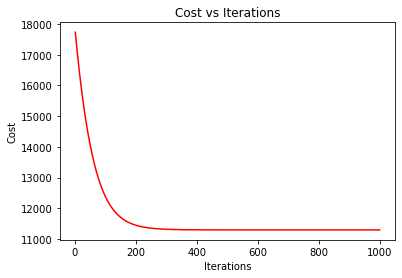

In [10]:
plot_function(cost)